# Project 1 - Applied Statistics
* Name - Amit Kumar Maiti
* Deadline - Jan 26, 2020
* Course - PGP-ML, Great Lake/Applied Statistics

# Objective: 
The objective of this project is to find insight from Insurance data through studying its features. Following are the learning outcomes:
    * Exploratory Data Analysis using Python
    * Practicing Statistics using Python
    * Hyothesis Testing
    
Introduction- Insurance industry is widely spread accross the whole world. It is subject to instance risk as it involves disease, accident, disability and death etc. of customers. Therefore, data analysis is important to provide competetive service at optimum cost based on varius aspect of customer.  

# Approach to Problem Solving:
1. Importing necessary Libraries
2. Reading/Understanding Data
3. EDA
4. Statistical Hypothesis

# 1. Importing Necessary Libraries

In [1]:
# Importing necessary python libraries:
import numpy as np                # Importing numpy
import pandas as pd               # Importing pandas
import matplotlib                 # Importing matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # Importing seaborn library

%matplotlib inline

In [2]:
# Ignoring Warnings in Anaconda jupyter Notebook:
import warnings
warnings.filterwarnings('ignore')

# 2. Reading Data

In [3]:
# Reading insurance data with file name 'insurance.csv'
insurance_data = pd.read_csv("insurance.csv")

In [4]:
# Reading First Five Rows of the Dataframe:
insurance_head = insurance_data.head()
insurance_head

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Reading Last Five Rows of the Dataframe:
insurance_tail = insurance_data.tail()
insurance_tail

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
# Finding column names or features in the data
insurance_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## Note 1
There are seven features/variables in the dataset. They are as follows: age, sex, bmi, children, smoker, region and charges.

# 3. Exploratory Data Analysis (EDA):

In [7]:
# a. Shape of the Data:
insurance_data.shape

(1338, 7)

## Note 2
There are 1338 rows and 7 colums in the dataset

In [8]:
# b. Data Type of Each Attributes:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


## Note 3
- There are three(3) categorical attributes i.e. sex, somker and region (objects) 
- There are four(4) numerical attributes i.e. age, bmi, children and charges
- Age and children are integer data types; bmi and charges are float data type

In [9]:
# c. Checking Missing Values:
insurance_isnull = insurance_data.isnull().values.sum()
insurance_isnull

0

## Note 4
* There is no missing value in any of the columns in the dataframe.

In [10]:
# d. 5 point summary of numerical attributes:
insurance_summary = insurance_data.describe(include = [np.number])
insurance_summary

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Note 5
- Average age is 39 wherein minimum age is 18 and the maximum age is 64.
- The Median bmi is 30.4. There are patients from underweight (bmi-15.9) to overweight (bmi-53.13). The majority of people are  under obesity or may be unhealthy.
- Children covered under insurrance from no children to maximum of five children.
- Median medical cost billed by Health insurance is 9382, however it goes upto 63770. The cost varies significantly with standard deviation 12110. It could be because of unhealthy situation of the individuals or having more children covered under insurance.

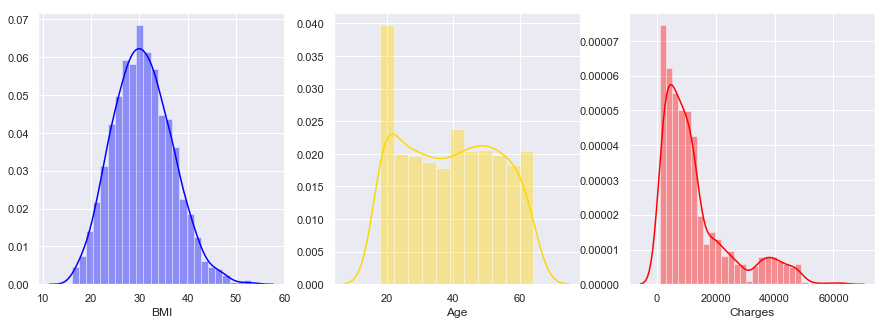

In [11]:
#e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns:
f, axes = plt.subplots(1,3, figsize=(15,5))
sns.distplot(insurance_data['bmi'], color = 'blue', ax = axes[0], axlabel = 'BMI')
sns.distplot(insurance_data['age'], color = 'gold',ax = axes[1], axlabel = 'Age')
sns.distplot(insurance_data['charges'], color = 'red', ax = axes[2], axlabel = 'Charges')
plt.show()

## Note 6
* 'bmi' is normaly distributed
* 'age' is bivarient as it has two peaks
* 'charges' feature is highly skewed at right (positive skewed)

In [12]:
# f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns:
# importing stats to find skewness
import scipy.stats.stats as stats

skew_bmi = insurance_data['bmi'].skew()
skew_age = insurance_data['age'].skew()
skew_charges = insurance_data['charges'].skew()

print("The skewness of 'bmi', 'age', & 'charges' are:\t",skew_bmi, skew_age, skew_charges, 'respectively')

The skewness of 'bmi', 'age', & 'charges' are:	 0.2840471105987448 0.05567251565299186 1.5158796580240388 respectively


## Note 7
* If the skewness is between -0.5 to 0.5, data is fairly symmetric, therefore 'bmi' & 'age' follows symmetric distribution.
* If the skewness is between less than -1 or greater than 1, data is highly skewed, therefore 'charges' is highly positively (right) skewed

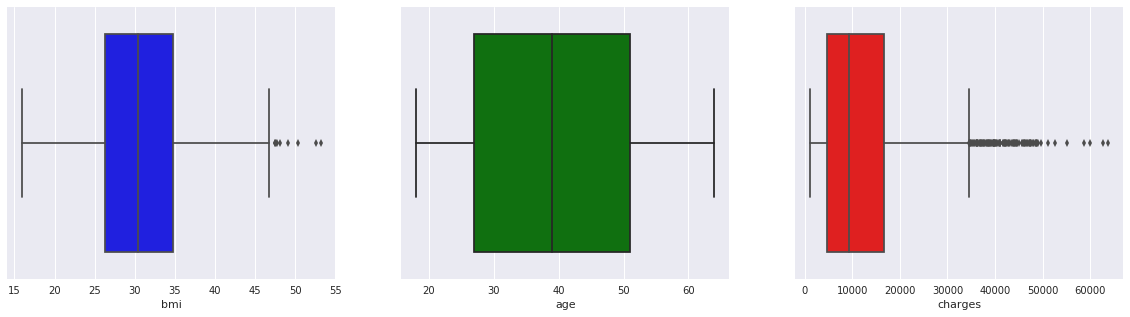

In [16]:
# g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns:
f, axes = plt.subplots(1, 3, figsize = (20, 5))
sns.boxplot(insurance_data['bmi'], color = 'blue', ax = axes[0])
sns.boxplot(insurance_data['age'], color = 'green', ax = axes[1])
sns.boxplot(insurance_data['charges'], color = 'red', ax = axes[2])

## Note 8
* There is no outlier in 'age' column but 'bmi' column has few outliers wherein 'charges' column has many outliers. The charges column has many extreme values therefore we would consider median charges (not mean) for generalization

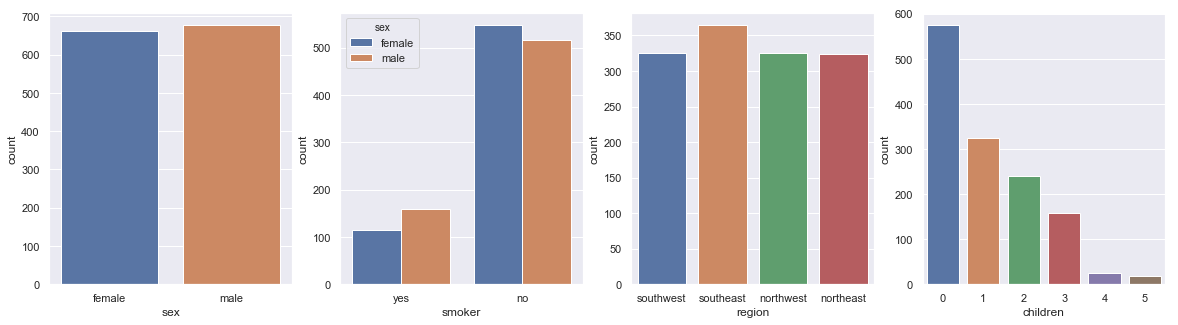

In [13]:
# h. Distribution of categorical columns (include children): #sex, #smoker, #region, #children
f, axes = plt.subplots(1,4, figsize = (20,5))
sns.countplot(x='sex', data = insurance_data, ax = axes[0])
sns.countplot(x='smoker', hue = 'sex',data = insurance_data, ax = axes[1])
sns.countplot(x = 'region', data = insurance_data, ax = axes[2])
sns.countplot(x = 'children', data = insurance_data, ax = axes[3])

## Note 9 
* Theare are almost equal number of male & female population with slight variance
* There are more male smoker than female & large population is non smoker
* There are more individuals from southern region
* Maximum individuals do not have children, average number of childeren is two & very few have five children

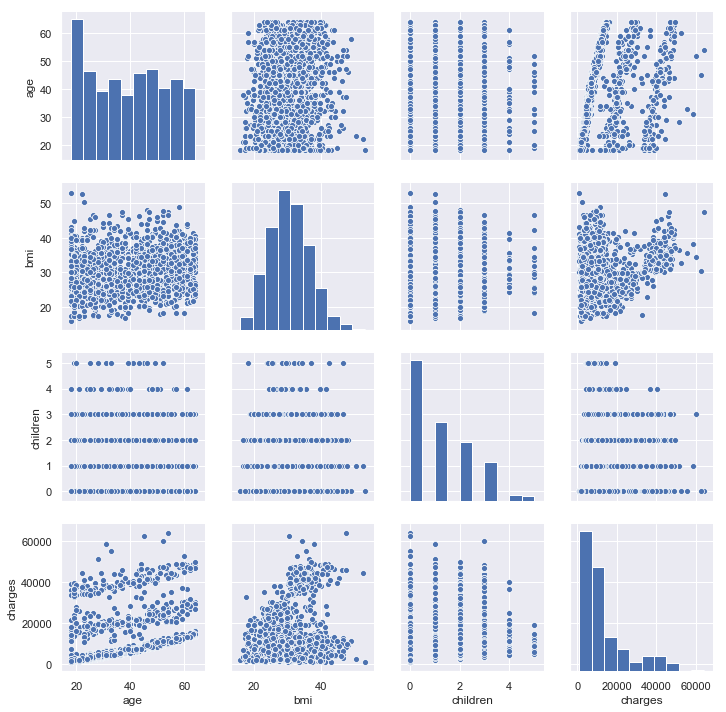

In [14]:
# i. Pair plot that includes all the columns of the data frame:
sns.pairplot(insurance_data) 
# Pair plot is displayed only for numerical data
plt.show()

## Note 10
* We do not find any significant co-rellation between two variables. Charges seems to increase with age
* BMI does not much vary with age, people can have higher rate of bmi at any age


# 4. Statistical Hypothesis

## Steps of Statistical Hypothesis Test
### Step 1 - Formulating Hypothesis
### Step 2 - Significant level 
### Step 3 - Statistical Test
### Step 4 - Decision Making
### Step 5 - Conclusion

In [15]:
## Importing statistical packages:
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp, wilcoxon
from statsmodels.stats.power import ttest_power
from statsmodels.stats.proportion import proportions_ztest

## a. Do charges of people who smoke differ significantly from the people who don't?

In [16]:
# Step 1 - Formulating Hypothesis

# Null Hypothesis: "Charges of people who smoke does not differ significantly from people who don't smoke" (mean1=mean2)
# Alternative Hyothesis: "Chearges of people who smoke does differ significantly from people who don't smoke" (mean1!=mean2)

# Creating two groups based on smoker

smoker_yes = insurance_data['smoker']=='yes'
charges_smoker = insurance_data[smoker_yes]['charges']
charges_smoker_mean = charges_smoker.mean()

smoker_no = insurance_data['smoker']=='no'
charges_nonsmoker = insurance_data[smoker_no]['charges']
charges_nonsmoker_mean = charges_nonsmoker.mean()

# Step 2- Significant level
## We consider alpha = 0.05 (Taking 5% chance of rejecting H0 when it should not- Type I error)


In [17]:
# Step 3 - Statistical Test
# 2 samples t-test: 

t_statistics_charges, p_value_charges = ttest_ind(charges_smoker, charges_nonsmoker)
print(t_statistics_charges, p_value_charges)

46.664921172723716 8.271435842177219e-283


In [18]:
# Step 4 - Decision Making
# If p-value < 0.05
# Alternative Hypothesis is True at 5% significant level
print("Two samples t-test p-value:", p_value_charges)

# Step 5 - Conclusion
print("We've statistical evidence to reject null hypothesis, as p-value is less than 0.05")

Two samples t-test p-value: 8.271435842177219e-283
We've statistical evidence to reject null hypothesis, as p-value is less than 0.05


### Conclusion 1 - There is significant difference of charges of people who smoke from the people who don't smoke

## b. Does bmi of males differ significantly from that of females?

In [19]:
## Step 1 - Formulating Hypothesis

# Null Hypothesis(H0): "There is no significant different of bmi of male from bmi of feamles" (mean1 = mean2)
# Alternative Hypothesis(Ha): "There is significant different of bmi of male from bmi of females" (mean1!=mean2)

# Creating two groups- bmi of male & bmi of female

insurance_male = insurance_data['sex'] == 'male'
insurance_male_bmi = insurance_data[insurance_male]['bmi']
insurance_male_bmi_mean = insurance_male_bmi.mean()

insurance_female = insurance_data['sex'] == 'female'
insurance_female_bmi = insurance_data[insurance_female]['bmi']
insurance_female_bmi_mean = insurance_female_bmi.mean()

# Step 2- Significant level
## We consider alpha = 0.05 (Taking 5% chance of rejecting H0 when it should not- Type I error)


In [20]:
# Step 3 - Statistical Test
# 2 samples t-test: 

t_statistics_bmi, p_value_bmi = ttest_ind(insurance_male_bmi, insurance_female_bmi)
print(t_statistics_bmi, p_value_bmi)

1.696752635752224 0.08997637178984932


In [21]:
# Step 4 - Decision Making
# Evaluating hypothesis:
# At 5% significant level(alpha = 5% or 0.05),
# We fail to reject null hypothesis as p_value_bmi > 0.05
print("Two samples t-test, p-value for bmi:", p_value_bmi)

# Step 5 - Conclusion 
print("We do not have enough statistical evidence to support null hypothesis, therefore, we've failed to reject null hypothesis.")

Two samples t-test, p-value for bmi: 0.08997637178984932
We do not have enough statistical evidence to support null hypothesis, therefore, we've failed to reject null hypothesis.


### Conclusion 2 - There is no significant difference of bmi of male from bmi of feamles.

## c. Is the proportion of smokers significantly different in different genders?

In [22]:
# Step 1 - Formulating Hypothesis

# Null Hypothesis(H0): "The proportion of smoker is not significantly differnt in difefrent genders" (mean1 = mean2)
# Alternative Hypothesis(Ha): "The proportion of smoker is significantly differnt in difefrent genders" (mean1 != mean2)

# Creating two groups - male & female
smoker_male = insurance_data[insurance_data['sex'] == 'male'].smoker.value_counts()[1] # The number of male smoker
smoker_female = insurance_data[insurance_data['sex'] == 'female'].smoker.value_counts()[1] #The number of female smoker

male_total = insurance_data.sex.value_counts()[0] # The total number of male in the insurance data
female_total = insurance_data.sex.value_counts()[1] # The total number of female in the insurance data

# Step 2- Significant level
## We consider alpha = 0.05 (Taking 5% chance of rejecting null hypothesis when it should not- Type I error)


In [23]:
# Male & female smoker proportion in the dataset 
print("The number of smoker male & female:\t\t\t", smoker_male, '&', smoker_female)
print("The total number of male and female in dataset:\t\t", male_total, '&', female_total)
print("The proportion of smoker male & feamle in the data:\t", round(smoker_male/male_total,2),'%', 
                                                                '&', round(smoker_female/female_total,2),'%')

The number of smoker male & female:			 159 & 115
The total number of male and female in dataset:		 676 & 662
The proportion of smoker male & feamle in the data:	 0.24 % & 0.17 %


The proportions are different but we need to test are they significantly differernt?

In [24]:
# Step 3- Statistical Test:
# Importing proportion test library
from statsmodels.stats.proportion import proportions_ztest

prop_statistics, prop_p_value = proportions_ztest([smoker_male,smoker_female], [male_total,female_total])
print("The test statistic and p-vale are:\t", prop_statistics, 'and', prop_p_value)

# Step 4 - Decision Making
# Evaluating hypothesis:
# Since, p-value < 0.05 , we reject the null Hypothesis at 5% significant level => Alternative Hypothesis is True

The test statistic and p-vale are:	 2.7867402154855503 and 0.005324114164320532


### Conclusion 3 - Therefore, "The proportion of smokers is significantly differ for difefrent genders" 

## d. Is the distribution of bmi across women with no children, one child and two children, the same?

In [25]:
# Step 1 - Formulating Hypothesis
# Null Hypothesis(H0): 
# "BMI accross women with no children, one child and two children are same" (mean1 = mean2 = mean3)
# Alternative Hypothesis(Ha): 
#"BMI accross women with no children, one child and two children are not same" (At least one mean differ)

# Step 2- Significant level
## We consider alpha = 0.05 (Taking 5% chance of rejecting H0 when it should not- Type I error)
## Consider F value/anova table as well

In [26]:
## Droping the following columns: 'age', 'smoker', 'region', 'charges' & creating a new dataframe 'df'
df = insurance_data.drop(columns = ['age', 'smoker', 'region', 'charges'])
df.head()

,sex,bmi,children
0,female,27.900,0
1,male,33.770,1
2,male,33.000,3
3,male,22.705,0
4,male,28.880,0


In [27]:
# Removing 'male' from dataframe
df = df[df.sex != 'male']

# Removing rows having more than two chidren
df = df[df.children != 3]
df = df[df.children != 4]
df = df[df.children != 5]

# Count of children
df.children.value_counts()

0    289
1    158
2    119
Name: children, dtype: int64

In [28]:
# Head of df after cleaning
df.head(5)

,sex,bmi,children
0,female,27.90,0
5,female,25.74,0
6,female,33.44,1
9,female,25.84,0
11,female,26.29,0


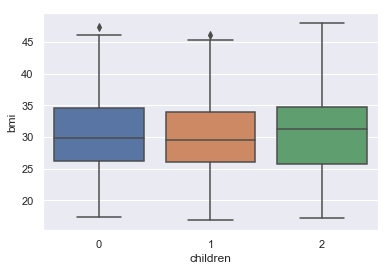

In [29]:
# Comparing women bmi in respective to number of children
sns.boxplot(df['children'], df['bmi'])

In [30]:
## Step 3 - Statistical Test
# One way ANOVA test
# Reason of one way anova- comparing children with bmi as 'sex' feature is 'female', same for all te rows
stats.f_oneway(df['bmi'][df['children'] == 0], 
             df['bmi'][df['children'] == 1],
             df['bmi'][df['children'] == 2])


F_onewayResult(statistic=0.3344720147757968, pvalue=0.7158579926754841)

In [31]:
# Step 3 - Statistical Test
# ANOVA test
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
 
mod = ols('children~bmi', data = df).fit()
anova_table = sm.stats.anova_lm(mod, typ=2)
print(anova_table)

              sum_sq     df         F   PR(>F)
bmi         0.043290    1.0  0.068411  0.79376
Residual  356.896639  564.0       NaN      NaN


In [32]:
# Step 4 Decision Making
print("From- f_oneway test: P-value is greater than 0.05, we've failed to reject null hypothesis")
print("From ANOVA table: probability is 0.79 (p-value), we've failed to reject null hypothesis")

From- f_oneway test: P-value is greater than 0.05, we've failed to reject null hypothesis
From ANOVA table: probability is 0.79 (p-value), we've failed to reject null hypothesis


### Conclusion 4 - BMI accross women with no children, one children & two children does not differ but same.

## Project Conclusion :
In this project we've worked on 'insurance' data, explored its variable/features & visualized them. Hypothesis tests have been 
conducted per requirment & found the folowing:
   - Insurance charges are higher for smoker & there are more male smoker than female
   - BMI could be of any range irespective to genders & BMI of women does not differ much with having more children
